Accuracy: 1.0
Confusion Matrix:
 [[2021    0]
 [   0  113]]


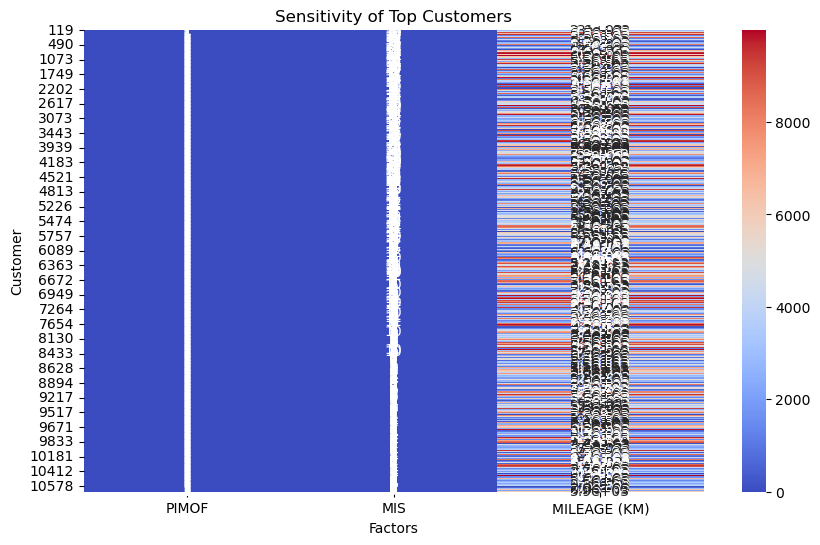

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Read the Dataset and Preprocess
data = pd.read_excel('Dummy Customer Compliant Data.xlsx', header=1)  # Update with  dataset path
# Convert 'Yes' and 'No' to 1 and 0 in the 'PIMOF' column
data['PIMOF'] = data['PIMOF'].map({'Yes': 1, 'No': 0})


# Step 2: Define Sensitivity Based on Criteria
# For example, customers with 'MIS' > 0, 'PIMOF' == 1, and 'Mileage [KM]' < 10000 are considered highly sensitive
data['Sensitivity'] = ((data['MIS'] > 0) & (data['PIMOF'] == 1) & (data['MILEAGE (KM)'] < 10000)).astype(int)

# Step 3: Train a Model
X = data[['PIMOF', 'MIS', 'MILEAGE (KM)']]
y = data['Sensitivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Evaluate the Model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Determine the top customers with high sensitivity
top_customers = data[data['Sensitivity'] == 1]

# Step 2: Create a heatmap to represent the sensitivity of the top customers
plt.figure(figsize=(10, 6))
sns.heatmap(top_customers[['PIMOF', 'MIS', 'MILEAGE (KM)']], cmap='coolwarm', annot=True)
plt.title('Sensitivity of Top Customers')
plt.xlabel('Factors')
plt.ylabel('Customer')
plt.show()


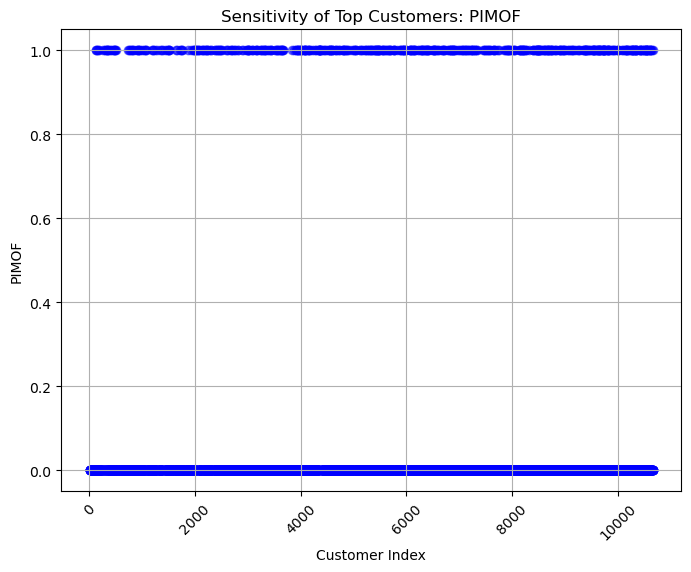

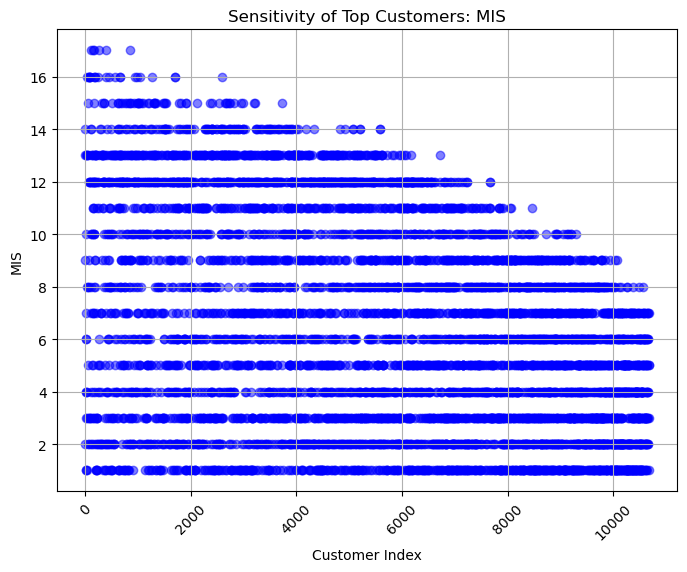

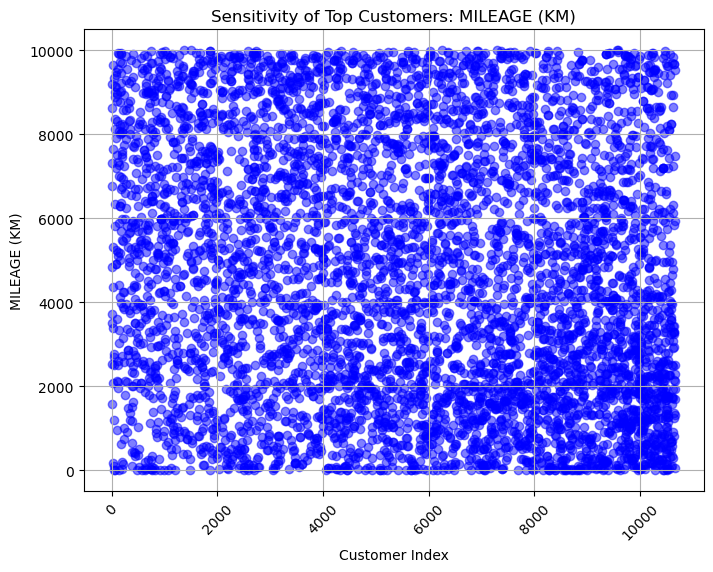

In [8]:
import matplotlib.pyplot as plt

# Step 1: Determine the top customers with high sensitivity
top_customers = data[data['Sensitivity'] == 1]

# Step 2: Create scatter plots for each factor
factors = ['PIMOF', 'MIS', 'MILEAGE (KM)']  # Specify the factors to analyze
for factor in factors:
    plt.figure(figsize=(8, 6))
    plt.scatter(top_customers.index, top_customers[factor], color='blue', alpha=0.5)
    plt.title(f'Sensitivity of Top Customers: {factor}')
    plt.xlabel('Customer Index')
    plt.ylabel(factor)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


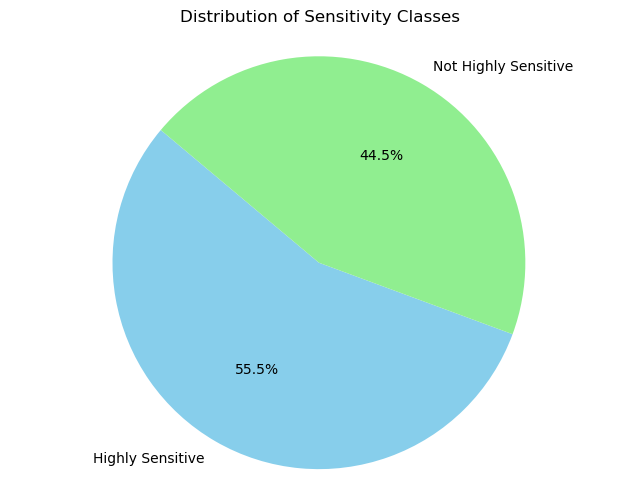

In [10]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Highly Sensitive', 'Not Highly Sensitive']
sizes = [1184, 950]  # Number of instances in each class

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Sensitivity Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


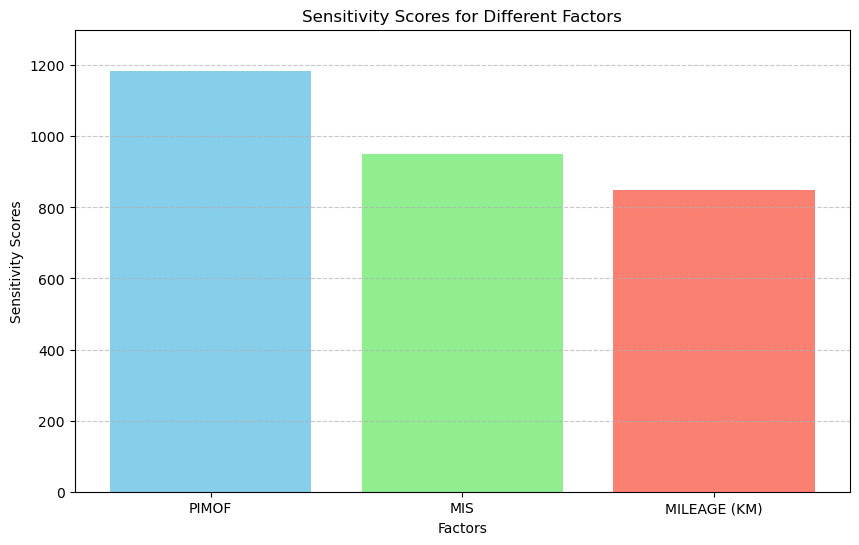

In [11]:
import matplotlib.pyplot as plt

# Data for the bar plot
factors = ['PIMOF', 'MIS', 'MILEAGE (KM)']
sensitivity_scores = [1184, 950, 850]  # Example sensitivity scores for each factor

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(factors, sensitivity_scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Sensitivity Scores for Different Factors')
plt.xlabel('Factors')
plt.ylabel('Sensitivity Scores')
plt.ylim(0, 1300)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
